# Question 1: Find the Center

One of the software division’s primary tasks is localizing the GPS positions of ODLCs,
which are ground markers, to indicate where payload drops should occur. As part of the
competition, we autonomously identify and localize these objects on the ground using a
downward-facing camera and a YOLOv8 image segmentation model. We take and
process pictures every 50 milliseconds, giving us hundreds of ODLC position estimates
that must be condensed into 5 unique collections. Lastly, in the competition, there are
emergent objects that may be accidentally identified as an ODLC in the airdrop zone;
these outliers greatly skew the center of the collections away from the “true” position.

#### Task
- Find the centroid of every collection, representing the “best” 
possible estimate of the ODLC’s position given N-ordered pairs 
describing (latitude, longitude) points.

- Filter out outliers as best as possible 
(note: It does not be the same as mine for every test case) 
(hint: Google!!)

#### Restrictions
Don’t use non-standard libraries except `pandas`, `sci-kit-learn`, 
`numpy`, `matplotlib`, and `geopandas`

#### File Input Format
The first line of input contains 𝑁 followed by 𝑁 lines with 
𝑙𝑎𝑡𝑖𝑡𝑢𝑑𝑒, 𝑙𝑜𝑛𝑔𝑖𝑡𝑢𝑑𝑒 separated by spaces of each point.

#### File Output Format
Output 5 lines, each with the identified center 𝑙𝑎𝑡𝑖𝑡𝑢𝑑𝑒, 𝑙𝑜𝑛𝑔𝑖𝑡𝑢𝑑𝑒 
rounded to 5 decimal places separated by spaces of each point. 

The coordinates do not have to match the ones provided exactly, 
but they should be within 20ft or 0.0038mi away.

### Start with No Outliers

#### 1. Load Inputs

In [43]:
import pandas as pd

filename = "no outliers.txt"
df = pd.read_csv(filename, sep=' ', skiprows=1, header=None, names=["latitude", "longitude"])
df

,latitude,longitude
0,37.682009,-121.892674
1,37.682212,-121.892932
2,37.682222,-121.892216
3,37.681791,-121.892456
4,37.681597,-121.892582
...,...,...
500,37.681969,-121.892754
501,37.682232,-121.892912
502,37.682242,-121.892196
503,37.681811,-121.892516


#### 2. Display the data

Matplotlib is building the font cache; this may take a moment.


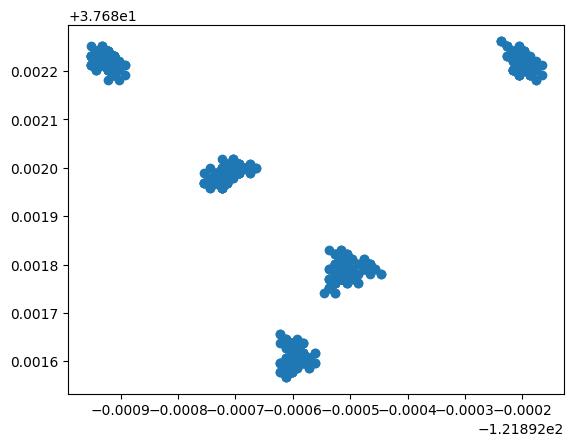

In [2]:
import matplotlib.pyplot as plt

plt.scatter(data=df, x="longitude", y="latitude")

#### 3. Clustering

User Guide: https://scikit-learn.org/stable/modules/clustering.html

| Method name | Parameters | Scalability | Usecase | Geometry (metric used) |
| --- | --- | --- | --- | --- |
| K-Means | number of clusters | Very large n_samples, medium n_clusters with MiniBatch code | General-purpose, even cluster size, flat geometry, not too many clusters, inductive | Distances between points |

So we can use `K-means Clustering`:
- API: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [9]:
from sklearn.cluster import KMeans

# train with 5 clusters
k_means = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(df)

In [10]:
# show the cluster labels
k_means.labels_

array([2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3,
       0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4,
       1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2,
       3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0,
       4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1,
       2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3,
       0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4,
       1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2,
       3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0,
       4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1,
       2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3,
       0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4,
       1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2,
       3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2,

In [11]:
# show the cluster centers
k_means.cluster_centers_

array([[  37.68221769, -121.8922017 ],
       [  37.68160787, -121.89259638],
       [  37.6819873 , -121.89271478],
       [  37.68222094, -121.89292734],
       [  37.68178639, -121.89250763]])

#### Plot as Cluster

In [12]:
df["cluster"] = k_means.labels_

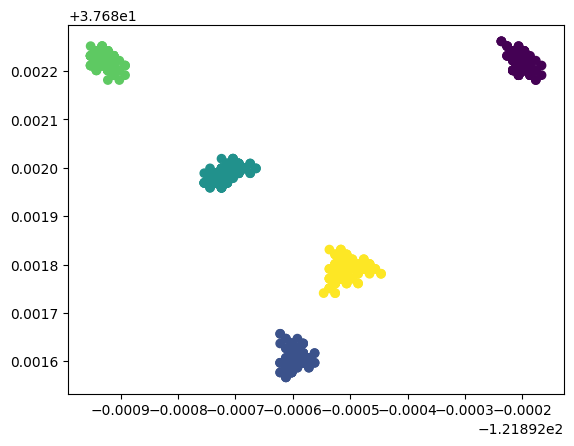

In [13]:
plt.scatter(data=df, x="longitude", y="latitude", c="cluster")

### Now with Outliers

In [30]:
# Load the data
import pandas as pd

filename = "no outliers.txt"
outlier_df = pd.read_csv(filename, sep=' ', skiprows=1, header=None, names=["latitude", "longitude"])
outlier_df

,latitude,longitude
0,37.682009,-121.892674
1,37.682212,-121.892932
2,37.682222,-121.892216
3,37.681791,-121.892456
4,37.681597,-121.892582
...,...,...
500,37.681969,-121.892754
501,37.682232,-121.892912
502,37.682242,-121.892196
503,37.681811,-121.892516


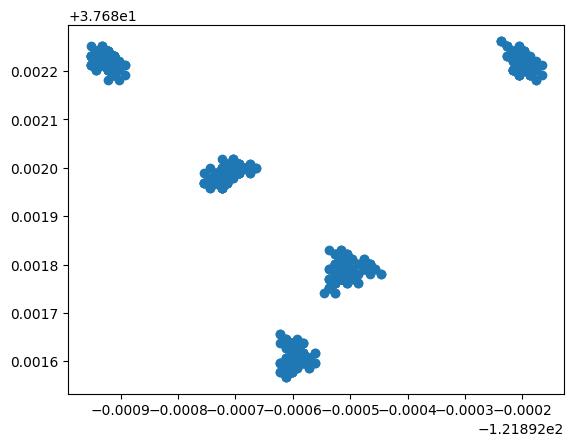

In [31]:
import matplotlib.pyplot as plt

plt.scatter(data=outlier_df, x="longitude", y="latitude")

In [32]:
from sklearn.cluster import KMeans

# train with 5 clusters
outlier_kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(outlier_df)
outlier_kmeans.labels_

array([2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3,
       0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4,
       1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2,
       3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0,
       4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1,
       2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3,
       0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4,
       1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2,
       3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0,
       4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1,
       2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3,
       0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4,
       1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2,
       3, 0, 4, 1, 2, 3, 0, 4, 1, 2, 3, 0, 4, 1, 2,

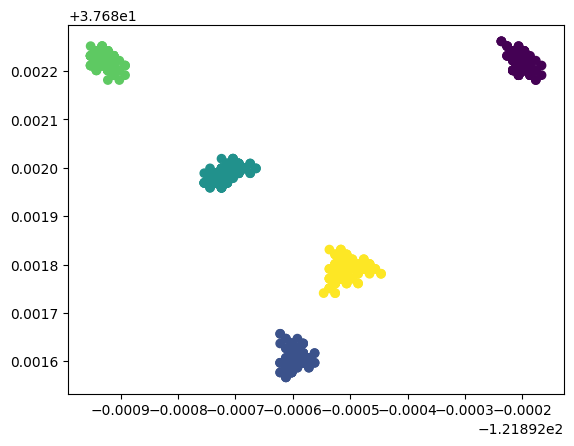

In [33]:
import matplotlib.pyplot as plt

# Look at the cluster
outlier_df["cluster"] = outlier_kmeans.labels_
plt.scatter(data=outlier_df, x="longitude", y="latitude", c="cluster")

The cluster doesn't look right due to the outliers. We need to remove the outliers.

#### Detect Outliers
https://scikit-learn.org/stable/modules/outlier_detection.html

LocalOutlierFactor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor

In [34]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
lof.fit_predict(outlier_df[["latitude", "longitude"]])
lof.negative_outlier_factor_

array([-1.25216634, -0.9770487 , -0.99250523, -1.17476876, -0.99025673,
       -1.0346788 , -1.00952195, -0.99898548, -1.11913296, -0.97889344,
       -0.99752388, -0.98830058, -1.00182222, -1.06954693, -0.96061838,
       -0.9705188 , -1.00952195, -0.99695645, -1.22180025, -0.98426591,
       -1.08052553, -0.98830058, -0.96512207, -1.1297428 , -0.96061838,
       -0.9705188 , -1.00952195, -0.99898548, -0.97789429, -0.98426591,
       -1.04917452, -0.9770487 , -0.96512207, -1.02886456, -1.02905229,
       -0.9705188 , -1.00167335, -0.99898548, -0.97789429, -0.98426591,
       -0.99025996, -0.98087391, -0.96512207, -0.95489552, -0.96061838,
       -0.9705188 , -1.16131145, -0.99898548, -1.05622896, -0.97889344,
       -1.04917452, -1.14546753, -0.96512207, -1.29781825, -1.01217197,
       -0.95851924, -1.00167335, -1.05064869, -1.05622896, -1.00603503,
       -0.98746721, -0.9770487 , -1.10991242, -0.95489552, -0.95000029,
       -0.9701698 , -1.        , -0.99695645, -1.04749423, -1.04

In [35]:
# check the distribution of factors
from scipy import stats

stats.describe(lof.negative_outlier_factor_)

DescribeResult(nobs=505, minmax=(np.float64(-1.984350702921958), np.float64(-0.9244075478928011)), mean=np.float64(-1.0653203911193332), variance=np.float64(0.023283448299278347), skewness=np.float64(-2.8070042971759577), kurtosis=np.float64(9.367597529808812))

(array([  2.,   1.,   3.,   5.,   9.,  11.,  24.,  25., 111., 314.]),
 array([-1.9843507 , -1.87835639, -1.77236207, -1.66636776, -1.56037344,
        -1.45437913, -1.34838481, -1.24239049, -1.13639618, -1.03040186,
        -0.92440755]),
 <BarContainer object of 10 artists>)

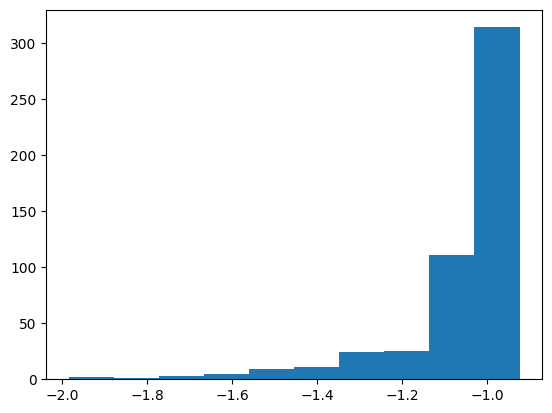

In [36]:
plt.hist(lof.negative_outlier_factor_)

In [37]:
# Seems majority are around -1, use -2 as the threshold for outliers
outlier_df["outlier"] = (lof.negative_outlier_factor_ < -2.0).astype(int)
outlier_df

,latitude,longitude,cluster,outlier
0,37.682009,-121.892674,2,0
1,37.682212,-121.892932,3,0
2,37.682222,-121.892216,0,0
3,37.681791,-121.892456,4,0
4,37.681597,-121.892582,1,0
...,...,...,...,...
500,37.681969,-121.892754,2,0
501,37.682232,-121.892912,3,0
502,37.682242,-121.892196,0,0
503,37.681811,-121.892516,4,0


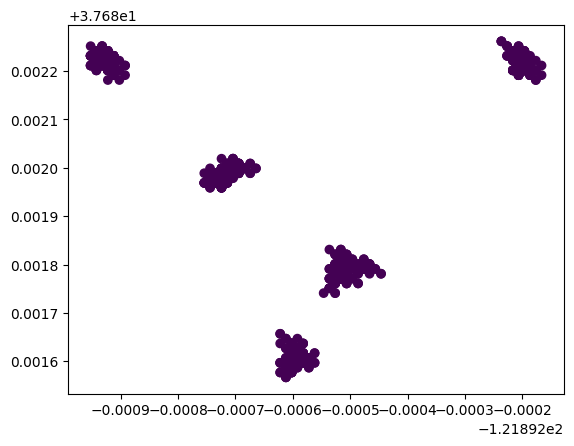

In [38]:
plt.scatter(data=outlier_df, x="longitude", y="latitude", c="outlier")

#### Remove Outliers

In [39]:
clean_df = outlier_df[outlier_df["outlier"] == 0]
clean_df

,latitude,longitude,cluster,outlier
0,37.682009,-121.892674,2,0
1,37.682212,-121.892932,3,0
2,37.682222,-121.892216,0,0
3,37.681791,-121.892456,4,0
4,37.681597,-121.892582,1,0
...,...,...,...,...
500,37.681969,-121.892754,2,0
501,37.682232,-121.892912,3,0
502,37.682242,-121.892196,0,0
503,37.681811,-121.892516,4,0


#### Re-Clustering

In [40]:
k_means = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(clean_df)
clean_df["cluster"] = k_means.labels_
clean_df

,latitude,longitude,cluster,outlier
0,37.682009,-121.892674,4,0
1,37.682212,-121.892932,1,0
2,37.682222,-121.892216,0,0
3,37.681791,-121.892456,3,0
4,37.681597,-121.892582,2,0
...,...,...,...,...
500,37.681969,-121.892754,4,0
501,37.682232,-121.892912,1,0
502,37.682242,-121.892196,0,0
503,37.681811,-121.892516,3,0


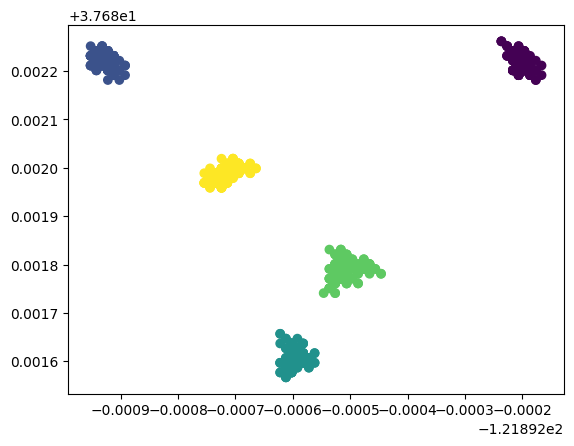

In [41]:
plt.scatter(data=clean_df, x="longitude", y="latitude", c="cluster")